Input Image:

In [1]:
from PIL import Image
import numpy as np

input_image = Image.open("lena512.bmp")
image_array = np.array(input_image)
height, width = image_array.shape

input_image.show()
print(image_array)
print(f"Shape: {image_array.shape}")  #(height, width)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
Shape: (512, 512)


Simple Halftoning Algorithm:

In [2]:
def apply_simple_halftoning(image_array, Threshold=128):
    height, width = image_array.shape
    for row in range(height):
        for column in range(width):
            pixel_value = image_array[row,column]
            if(pixel_value<Threshold):
                image_array[row,column] = 0
            else:
                image_array[row,column] = 255

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


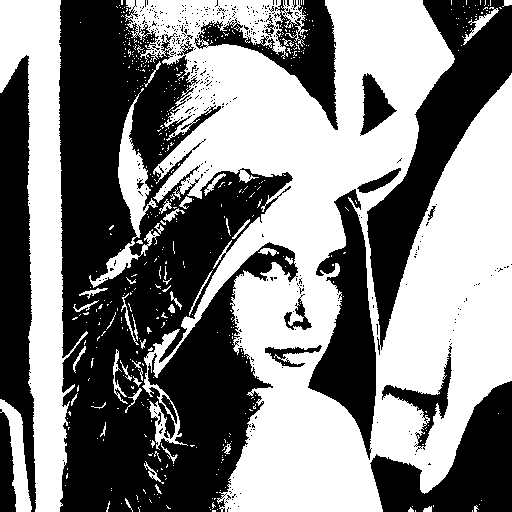

In [3]:
apply_simple_halftoning(image_array)
print(image_array)
Image.fromarray(image_array).save("simple_halftoned_image.bmp")
Image.open("simple_halftoned_image.bmp")

Advanced Halftoning Algorithm:

In [4]:
def apply_advanced_halftoning(image_array, Threshold=128):
    height, width = image_array.shape
    for row in range(height):
        for column in range(width):
            pixel_value = image_array[row,column]
            if(pixel_value<Threshold):
                image_array[row,column] = 0
            else:
                image_array[row,column] = 255
            #propagate the error to its neighbors
            error = pixel_value - image_array[row,column]
            if column+1<width:
                image_array[row,column+1] += error*(7/16)
            if row+1<height and column+1<width:
                image_array[row+1,column+1] += error*(1/16)
            if row+1<height:
                image_array[row+1,column] += error*(5/16)
            if row+1<height and column-1>=0:
                image_array[row+1,column-1] += error*(3/16)

[[255   0 255 ... 255 255   0]
 [255 255   0 ... 255   0 255]
 [  0 255 255 ... 255 255   0]
 ...
 [  0   0   0 ... 255   0 255]
 [  0   0 255 ... 255   0   0]
 [  0   0   0 ...   0 255   0]]


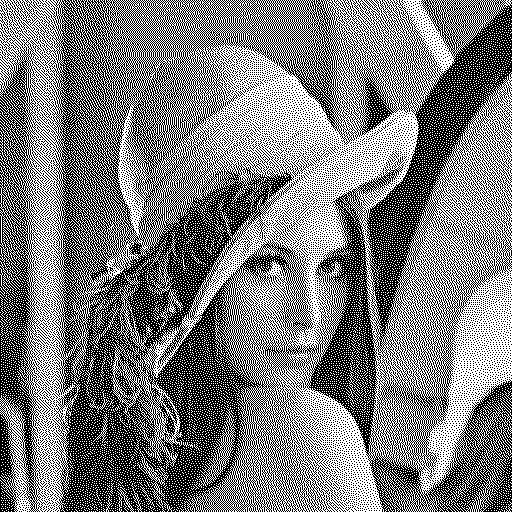

In [5]:
image_array = np.array(input_image).astype(float)
apply_advanced_halftoning(image_array)
image_array = image_array.astype(np.uint8)
print(image_array)
Image.fromarray(image_array).save("advanced_halftoned_image.bmp")
Image.open("advanced_halftoned_image.bmp")